## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [58]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.metrics import classification_report


In [2]:
stu_df = pd.read_csv('students-data.csv', delimiter=';')

In [3]:
stu_df1 = stu_df

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
stu_df.rename_axis('number', inplace=True)

In [5]:
stu_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no missing values

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [6]:
non_num_df = stu_df.select_dtypes(['object'])


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [7]:
stu_df = stu_df.drop(labels=[x for x in stu_df.columns if stu_df[x].dtype !='object' and stu_df[x].var() < 1], axis=1)

In [8]:
stu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [9]:
category_mask = stu_df.dtypes == 'object'
cols = stu_df.columns[category_mask].tolist()

In [10]:
le = LabelEncoder()
stu_df[cols] = stu_df[cols].apply(lambda col: le.fit_transform(col))

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [11]:
stu_df.loc[stu_df['G1']<10,'G1']=0
stu_df.loc[stu_df['G1']>=10,'G1']=1
stu_df.loc[stu_df['G2']<10,'G2']=0
stu_df.loc[stu_df['G2']>=10,'G2']=1
stu_df.loc[stu_df['G3']<10,'G3']=0
stu_df.loc[stu_df['G3']>=10,'G3']=1
#stu_df['Pass'] = np.where((stu_df['G1']<=10)|(stu_df['G2']<=10)|(stu_df['G3']<=10),0,1)

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [12]:
X = stu_df.drop('G3', axis=1)
y = stu_df['G3']

In [13]:
stu_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

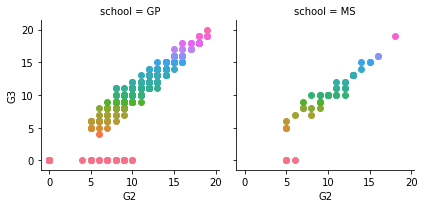

In [14]:
g = sns.FacetGrid(stu_df1, col="school", hue='G3')
g.map(plt.scatter, "G2","G3");


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

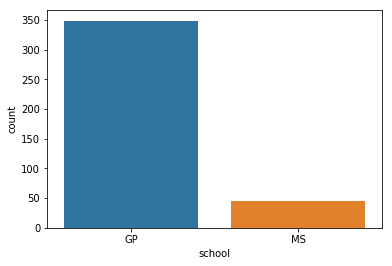

In [15]:
sns.countplot(x="school", data=stu_df1)

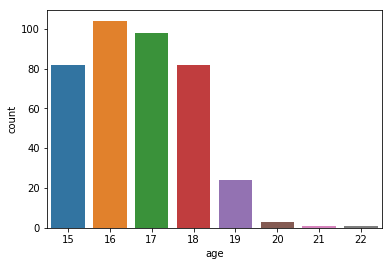

In [16]:
sns.countplot(x="age", data=stu_df1)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [18]:
model = LogisticRegression()

In [19]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)


C:\Users\Suhai\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
model_score = model.score(X_test, y_test)
model_score

0.9411764705882353

In [21]:
pd.DataFrame(data=[accuracy_score(y_test, y_predict), 
                   f1_score(y_test, y_predict)], 
             index=["accuracy", "f1_score"])

,0
accuracy,0.941176
f1_score,0.960000


# Naive bayes with Iris data

### Import Iris.csv

In [29]:
iris_df = pd.read_csv('iris.csv')

In [30]:
iris_df.shape

(150, 5)

In [31]:
iris_df.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [33]:
iris_df.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [34]:
X = iris_df.drop('Class', axis=1)
y = pd.factorize(iris_df['Class'])[0]

### Find the distribution of target variable (Class)

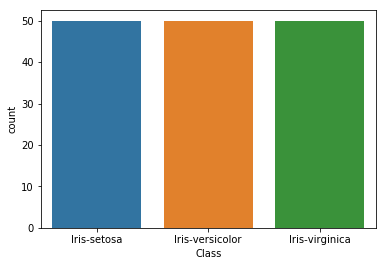

In [35]:
sns.countplot(x='Class', data=iris_df)

The distribtion of the class variable is constant for all three classes at 50

### Plot the distribution of target variable using histogram

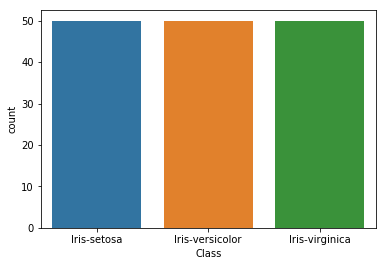

In [36]:
sns.countplot(x='Class', data=iris_df)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

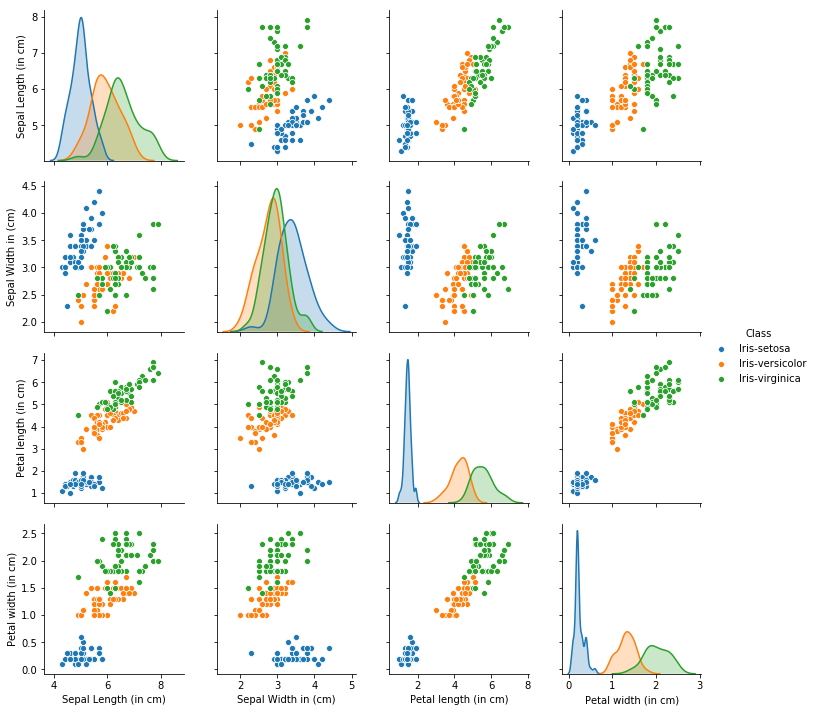

In [37]:
sns.pairplot(iris_df, hue='Class')

Sepal width seems to be have the least variance when compared to the target varibale(class). The others show good differentiation when compared to class, especially petal width and petal length.

### Summary Statistics and explain insights for at least 2 variables

The target variable is divided equally into 3 different categories and is especially influenced by Petal width and petal length

Sepal width does not affect the class much but has clear differentiation with petal width and length however, that cannot be said for sepal length where the coorelation is pretty low

### Correlation among all variables and give your insights

In [38]:
iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


Sepal width has a negative correlation with the other variables but compared to the correrlations among other variables, its value is quite low

### Do Feature Scaling

In [39]:
X = X.apply(zscore)

### Split data in Training and Validation in 80:20

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Train and Fit NaiveBayes Model

In [43]:
model = GaussianNB()

In [44]:
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


### Print Accuracy and Confusion Matrix and Conclude your findings

In [45]:
predicted = model.predict(X_test)

In [46]:
metrics.confusion_matrix(predicted, y_test)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 3, 9]], dtype=int64)

In [47]:
accuracy_score(y_test, predicted)

0.8333333333333334

In [59]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.82      0.75      0.78        12
           2       0.75      0.82      0.78        11

   micro avg       0.83      0.83      0.83        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.84      0.83      0.83        30



We can infer that the precision and recall for Iris- Setosa is 100% i.e No False positive or false negative. The model is able to classify it perfectly. Whereas for Iris- Versicolor, the recall is rather low ar 75% i.e there are a lot of false negatives. This model does a slightly better job for Virginica for identifiying false negatives - 82% but loses it in the false positives.
To conclude the model is extremely accurate in predicting Iris Setosa